# Data Wrangling

## Gather
#### Define
- import csv file (twitter-archive-enhanced.csv) into a DataFrame (df_twitter_raw)
- import tsv file (image-predictions.tsv) into a DataFrame (df_images_raw)
- import json file (tweet-json.txt) into a DataFrame (df_tweets_raw)

#### Code

In [1]:
import pandas as pd
import json

In [2]:
df_twitter_raw = pd.read_csv('Raw Data/twitter-archive-enhanced.csv')

In [3]:
df_images_raw = pd.read_csv('Raw Data/image-predictions.tsv', sep='\t')

In [4]:
tweets = []
with open('Raw Data/tweet-json.txt') as f:
    for line in f:
        tweets.append(json.loads(line))
dic_tweets = tweets[0].keys()
df_tweets_raw = pd.DataFrame(tweets, columns = dic_tweets)

In [5]:
df_tweets_raw.to_csv('tweets_raw.csv', index= False)

## Assess
#### Define
- asses the 3 dataframes visually and programatically

In [6]:
df_twitter_raw.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [7]:
df_twitter_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- remove not required columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Set column (tweet_id) as index
- change dtype for timestamp
- add a rating column = (rating_numerator/rating_denominator)

In [8]:
df_images_raw.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [9]:
df_images_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- make column (tweet_id) index

In [10]:
df_tweets_raw.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en


In [11]:
df_tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 27 columns):
created_at                       2354 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null object
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null object
coordinates                      0 non-null

- change the column name from id to tweet_id
- make column (tweet_id) index
- keep only the required columns ('created_at','id','full_text','retweet_count','favorite_count')
- change dtype for timestamp

- check for duplicates

In [12]:
sum(df_twitter_raw.duplicated())

0

In [13]:
sum(df_images_raw.duplicated())

0

In [14]:
sum(df_tweets_raw['id'].duplicated())

0

#### Findings
##### df_twitter_raw
- remove not required columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)
- Set column (tweet_id) as index
- change dtype for timestamp
- add a rating column = (rating_numerator/rating_denominator)

##### df_images_raw
- make column (tweet_id) index

##### df_tweets_raw
- change the column name from id to tweet_id
- keep only the required columns ('created_at','id','full_text','retweet_count','favorite_count')
- make column (tweet_id) index
 


## Clean
#### Define
- clean all the findings above
- combine a master dataframe with index (tweet_id)
- remove the 2 tweets with no retweet and favorite data
- creat another dataframe with all nonnull values for images
- verify the time stamp and tweet text from tweets & twitter dataframes

#### Code

##### df_twitter_raw
- remove not required columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

In [15]:
df_twitter_clean = df_twitter_raw.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'])


- change dtype for timestamp
- Set column (tweet_id) as index

In [16]:
df_twitter_clean['timestamp']= pd.to_datetime(df_twitter_clean['timestamp'])
df_twitter_clean.set_index('tweet_id', inplace =True)
df_twitter_clean.head(2)

,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


- add a rating column = (rating_numerator/rating_denominator)

In [17]:
df_twitter_clean['rating'] = df_twitter_clean['rating_numerator'] / df_twitter_clean['rating_denominator']

- test

In [18]:
df_twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
rating                2356 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 220.9+ KB


- Save Result

In [19]:
df_twitter_clean.to_csv('twitter_clean.csv')

##### df_images_raw
- make column (tweet_id) index

In [20]:
df_images_clean= df_images_raw.copy()
df_images_clean.set_index('tweet_id', inplace=True)
df_images_clean.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- Save result

In [21]:
df_images_clean.to_csv('images_clean.csv')

##### df_tweets_raw
- change the column name from id to tweet_id

In [22]:
df_tweets_raw = df_tweets_raw.rename(columns = {'id':'tweet_id'})

- change dtype for timestamp

In [23]:
df_tweets_raw['created_at']= pd.to_datetime(df_tweets_raw['created_at'])

- keep only the required columns ('created_at','id','full_text','retweet_count','favorite_count')

In [24]:
df_tweets_clean = df_tweets_raw[['tweet_id','created_at','full_text','retweet_count','favorite_count']].copy()

- make column (tweet_id) index

In [25]:
df_tweets_clean.set_index('tweet_id', inplace= True)
df_tweets_clean.head(2)

,created_at,full_text,retweet_count,favorite_count
tweet_id,,,,
892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,8853,39467
892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,6514,33819


- test

In [26]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 4 columns):
created_at        2354 non-null datetime64[ns]
full_text         2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 92.0+ KB


- Save Results

In [27]:
df_tweets_clean.to_csv('tweets_clean.csv')

- combine a master dataframe with index (tweet_id)


In [28]:
df_twitter_tweets = pd.concat([df_twitter_clean, df_tweets_clean], axis = 1)

In [29]:
df_twitter_master = pd.concat([df_twitter_tweets, df_images_clean], axis = 1)

- test

In [30]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 666020888022790149 to 892420643555336193
Data columns (total 26 columns):
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
rating                2356 non-null float64
created_at            2354 non-null datetime64[ns]
full_text             2354 non-null object
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
jpg_url               2075 non-null object
img_num               2075 non-null float64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075

- remove the 2 tweets with no retweet and favorite data


In [31]:
df_twitter_master.dropna(subset = ['retweet_count'], axis= 0,  inplace = True)

- verify the time stamp and tweet text from tweets & twitter dataframes

In [32]:
df_twitter_master['timestamp_verify'] = df_twitter_master['timestamp'].equals(df_twitter_master['created_at'])
df_twitter_master['text_verify'] = df_twitter_master['text'].equals(df_twitter_master['full_text'])

In [33]:
df_twitter_master['timestamp_verify'].value_counts()

True    2354
Name: timestamp_verify, dtype: int64

In [34]:
df_twitter_master['text_verify'].value_counts()

True    2354
Name: text_verify, dtype: int64

In [35]:
df_twitter_master.drop(columns = ['timestamp_verify', 'text_verify', 'created_at','full_text'], inplace=True)


In [36]:
df_twitter_master.to_csv('twitter_master.csv')

- creat another dataframe with all nonnull values for images

In [37]:
df_twitter_master_images = df_twitter_master.dropna(subset = ['jpg_url'], axis= 0)

In [38]:
df_twitter_master_images.to_csv('twitter_master_images.csv')


- Data ready to act on it.

In [39]:
import matplotlib

In [40]:
% matplotlib inline

ValueError: range parameter must be finite.

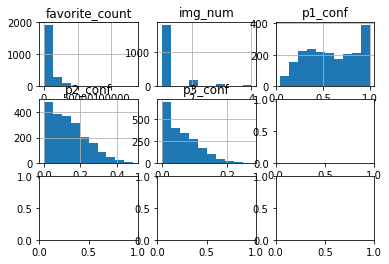

In [41]:
df_twitter_master.hist()

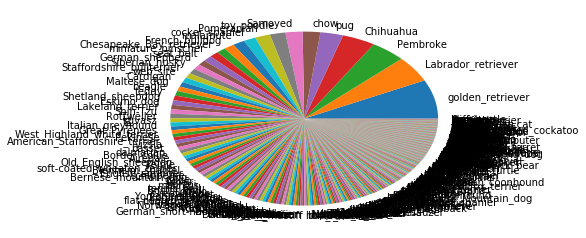

In [43]:
df_twitter_master_images['p1'].value_counts().plot(kind= 'pie')

In [44]:
df_twitter_master_images['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      88
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [45]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 666020888022790149 to 892420643555336193
Data columns (total 24 columns):
timestamp             2354 non-null datetime64[ns]
source                2354 non-null object
text                  2354 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  2354 non-null object
doggo                 2354 non-null object
floofer               2354 non-null object
pupper                2354 non-null object
puppo                 2354 non-null object
rating                2354 non-null float64
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
jpg_url               2073 non-null object
img_num               2073 non-null float64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null object
p2                    2073 non-null object
p2_conf               2073 non-nul